# Nouvelle section

In [ ]:
### Code final
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import pandas_profiling

In [ ]:

df = pd.read_csv("/content/vispremv.dat", sep=' ')


In [ ]:
df.head()

SEXEQ FAMIQ PCSPQ kvunbq  ...     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint     K1  ...  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint     K0  ...  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     K0  ...  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     K0  ...  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint     K0  ...  11.304904   0.000000  1.386294  Coui

[5 rows x 54 columns]

In [ ]:
df.describe()

RELAT         AGER  ...       HAVEFL       JNBJDL
count  1063.000000  1063.000000  ...  1063.000000  1063.000000
mean    132.574788    42.573848  ...     3.043170     1.189791
std      93.499830    11.912343  ...     4.665580     1.587594
min      -2.000000    18.000000  ...     0.000000     0.000000
25%      42.500000    33.000000  ...     0.000000     0.000000
50%     130.000000    43.000000  ...     0.000000     0.000000
75%     204.500000    52.000000  ...     6.216606     2.441401
max     393.000000    65.000000  ...    15.770893     4.905275

[8 rows x 28 columns]

In [ ]:
df.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [ ]:
df.PCSPQ.value_counts()

Psan    301
Pouv    287
Pint    277
Pemp    167
Pcad     31
Name: PCSPQ, dtype: int64

In [ ]:
var_dum = pd.get_dummies(df[["SEXEQ", "FAMIQ", "PCSPQ"]], drop_first=True)

df_final = pd.concat([var_dum, df[["AGER", "ITAVCL", "ROCNB", "QSMOY", "QCREDL", "CARVP"]]], axis=1)

In [ ]:
print(df_final.CARVP.value_counts())
df_final.describe()


Cnon    706
Coui    357
Name: CARVP, dtype: int64


SEXEQ_Shom   FAMIQ_Fseu  ...          QSMOY       QCREDL
count  1063.000000  1063.000000  ...    1063.000000  1063.000000
mean      0.621825     0.451552  ...   10629.129821     2.238062
std       0.485160     0.497882  ...   23825.306640     1.416175
min       0.000000     0.000000  ...  -70050.000000     0.000000
25%       0.000000     0.000000  ...     440.000000     1.386294
50%       1.000000     0.000000  ...    4421.000000     2.484907
75%       1.000000     1.000000  ...   11111.000000     3.218876
max       1.000000     1.000000  ...  241827.000000     6.855409

[8 rows x 11 columns]

# Nouvelle section

# PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

vispremv = pd.read_table('vispremv.dat', delimiter=' ')

# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fseu"], axis=1, inplace=True)

# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])

# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
print(vispremR.columns)
print(vispremR.shape)

y=vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

scaler = StandardScaler()
scaler.fit(vispremR)
X_train_scaled = scaler.transform(vispremR)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')
(1063, 35)


1063 35
[7.70557093e+00 3.74260023e+00 2.11096490e+00 1.85200816e+00
 1.68720331e+00 1.50539196e+00 1.39002496e+00 1.37101020e+00
 1.26428300e+00 1.09940772e+00 1.01109316e+00 9.91817218e-01
 9.61714181e-01 8.87425999e-01 8.82641082e-01 7.86625430e-01
 7.32562805e-01 7.03432073e-01 6.41946302e-01 5.20721631e-01
 4.88023814e-01 4.20351650e-01 3.93929258e-01 3.64369066e-01
 3.29037751e-01 2.41691379e-01 2.16928641e-01 1.64155118e-01
 1.40898976e-01 1.34499828e-01 9.57252950e-02 8.82017179e-02
 4.71711182e-02 2.65711246e-02 1.61778580e-30]


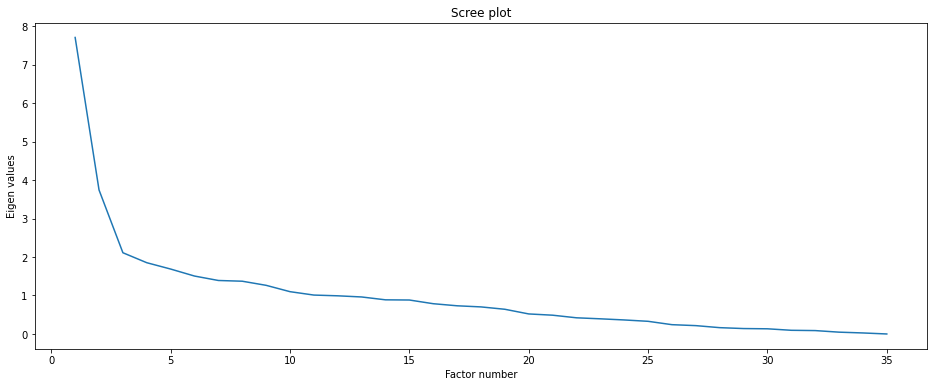

In [ ]:
from sklearn.decomposition import PCA

n=y.shape[0] #nb d'indivdus
p=X_train_scaled.shape[1] #nb de variables
print(n, p)
f = p
pca = PCA(n_components=f)
pca_obj=pca.fit_transform(X_train_scaled)

#Valeur propres
eigval = (n-1)/n*pca.explained_variance_ 
print(eigval)

#Eboulis des valeurs propres
plt.plot(np.arange(1,f+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

Nb de facteurs  35
Variance expliquée 1.0
[22.  32.7 38.7 44.  48.8 53.1 57.1 61.  64.6 67.7 70.6 73.4 76.1 78.6
 81.1 83.3 85.4 87.4 89.2 90.7 92.1 93.3 94.4 95.4 96.3 97.  97.6 98.1
 98.5 98.9 99.2 99.5 99.6 99.7 99.7]


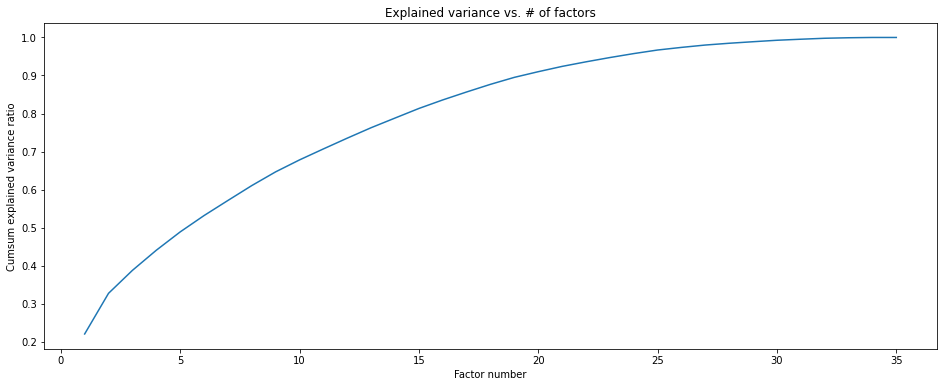

In [ ]:
#Pourcentage de variance expliquée par les axes retenus.
print("Nb de facteurs ",f)
print("Variance expliquée", sum(pca.explained_variance_ratio_))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print (var)

# graphique du cumul de variance restituée selon le nombre de facteurs 
plt.plot(np.arange(1,f+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show() 

            id     COR_1     COR_2    COS2_1    COS2_2
0   SEXEQ_Shom  0.226756  0.240128  0.051418  0.057661
1   FAMIQ_Fcou  0.190347  0.084089  0.036232  0.007071
2   PCSPQ_Pcad  0.124707  0.072885  0.015552  0.005312
3   PCSPQ_Pemp  0.186761 -0.033625  0.034880  0.001131
4   PCSPQ_Pint  0.162510  0.149775  0.026410  0.022433
5   PCSPQ_Pouv -0.034068  0.034519  0.001161  0.001192
6   PCSPQ_Psan -0.322184 -0.180001  0.103803  0.032401
7        RELAT  0.366970 -0.158516  0.134667  0.025127
8         AGER  0.303798 -0.115856  0.092293  0.013423
9       OPGNBL  0.452526  0.234930  0.204780  0.055192
10      MOYRVL  0.808953  0.260572  0.654404  0.067898
11      TAVEPL  0.665074 -0.540767  0.442323  0.292429
12      ENDETL  0.477713  0.437969  0.228210  0.191816
13      GAGETL  0.576236  0.548345  0.332048  0.300683
14      GAGECL  0.281677  0.453576  0.079342  0.205731
15      GAGEML  0.441368  0.411439  0.194806  0.169282
16       KVUNB  0.506915  0.411411  0.256963  0.169259
17       Q

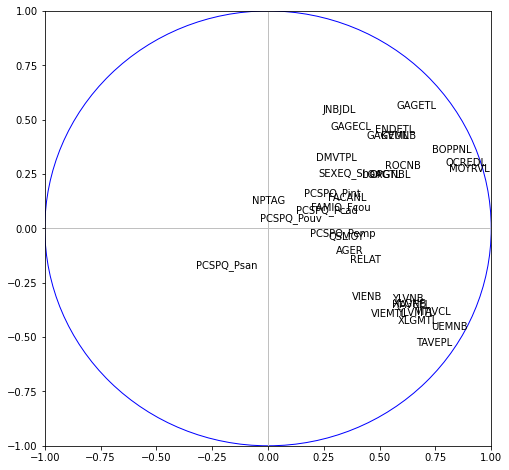

In [ ]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
for k in range(p): 
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k] 
    
#cosinus carré des variables 
cos2var = corvar**2 

#afficher la matrice des corrélations variables x facteurs 
print(pd.DataFrame({'id':vispremR.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],
                                'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

#cercle des corrélations 
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) 

#affichage des étiquettes (noms des variables) 
for j in range(p): 
    plt.annotate(vispremR.columns[j],(corvar[j,0],corvar[j,1])) 

#ajouter les axes 
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle) 

#affichage 
plt.show()


['Cnon' 'Coui']


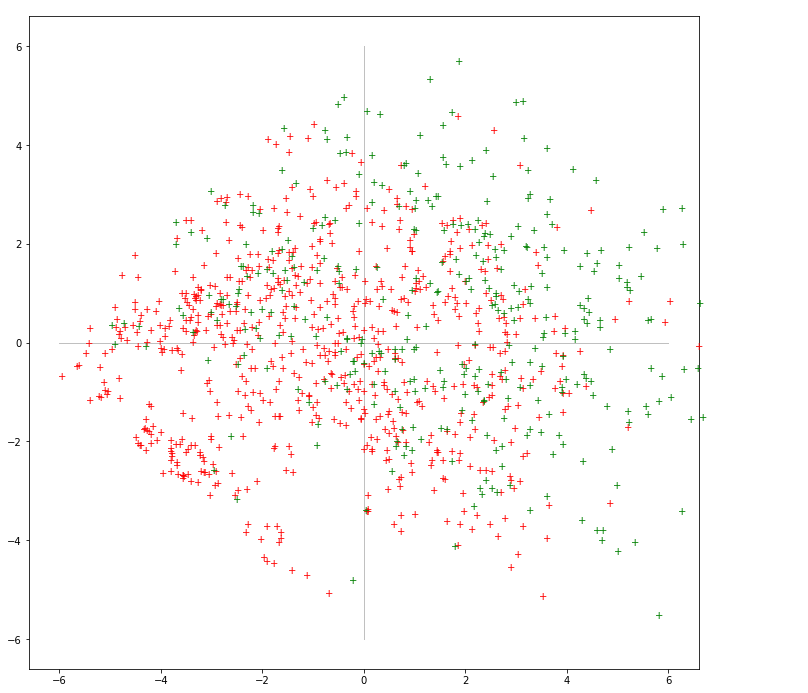

In [ ]:
#traitement de var. quali supplémentaire 
vsQuali = vispremv["CARVP"]
modalites = np.unique(vsQuali) 
print(modalites)

#liste des couleurs 
couleurs = ['r','g','b'] 
#faire un graphique en coloriant les points f
ig, axes = plt.subplots(figsize=(12,12)) 
#axes.set_xlim(-6,6) 
#axes.set_ylim(-6,6) 

#pour chaque modalité de la var. illustrative 
for c in range(len(modalites)): 
    #numéro des individus concernés 
    numero = np.where(vsQuali == modalites[c]) 
    #les passer en revue pour affichage 
    for i in numero[0]: 
        plt.annotate("+",(pca_obj[i,0],pca_obj[i,1]),color=couleurs[c]) 
        #plt.annotate(X.index[i],(pca_obj[i,0],pca_obj[i,1]),color=couleurs[c]) 

#ajouter les axes 
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1) 

#affichage 
plt.show()


In [ ]:
#coordonnées d'une variables supplémentaire qualitative
#structure intermédiaire 
df = pd.DataFrame({'Finition':vsQuali,'F1':pca_obj[:,0],'F2':pca_obj[:,1]}) 
#puis calculer les moyennes conditionnelles 
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

                F1        F2
Finition                    
Cnon     -0.799177 -0.262114
Coui      1.580446  0.518355


# SVM

In [ ]:
## SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

Y = df_final.CARVP
X = df_final.loc[:, 'FAMIQ_Fseu':'QCREDL']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

svc = SVC (kernel='linear')

svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print(pd.crosstab(Y_pred,Y_test))
print(classification_report(Y_test, Y_pred)) 

print(accuracy_score(Y_pred, Y_test))




# LOGISTIC REGRESSION

In [ ]:
##logistique

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

var_d = pd.get_dummies(df[["SEXEQ", "FAMIQ", "PCSPQ"]], drop_first=True)

# Selection of numerical variables
df_num = df.select_dtypes(exclude=['object'])

df_fin = pd.concat([var_d, df_num], axis=1)

Y = df["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)


#Y = df_final.CARVP
X = df_fin.loc[:, 'SEXEQ_Shom':'HAVEFL']


#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2')
logreg.fit(X_train, Y_train)

predictions = logreg.predict(X_test)

#model accuracy
score = logreg.score(X_test, Y_test)
print(score)

0.8544600938967136


In [ ]:
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       148
           1       0.78      0.72      0.75        65

    accuracy                           0.85       213
   macro avg       0.83      0.82      0.82       213
weighted avg       0.85      0.85      0.85       213



# ROC

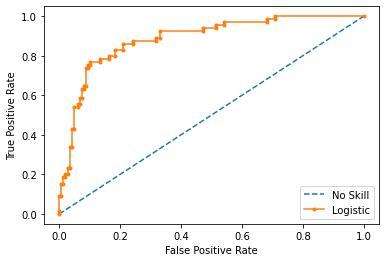

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# retrieve just the probabilities for the positive class
pos_probs = logreg.predict_proba(X_test)
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pos_probs[:,1])
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Counter({0: 249, 1: 1})


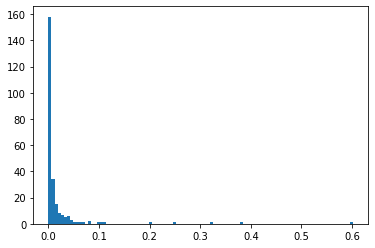

In [69]:
# summarize the distribution of predicted probabilities
from collections import Counter
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# generate 2 class dataset
X, Y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, Y)
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# predict class labels
yhat = model.predict(testX)
# summarize the distribution of class labels
print(Counter(yhat))
# create a histogram of the predicted probabilities
pyplot.hist(pos_probs, bins=100)
pyplot.show()

In [ ]:
# example of a roc auc for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(X_train, Y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(Y_test, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2')
model.fit(X_train, Y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(Y_test, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.506
Logistic ROC AUC 0.895


In [ ]:
from sklearn.model_selection import GridSearchCV
# Parameters
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitL = GridSearchCV(LogisticRegression(C=1, penalty='l2', solver='liblinear'), param,cv=5,n_jobs=-1)
logitLasso=logitL.fit(X_train, Y_train)

predictions2 = logitL.predict(X_test)
score = logitL.score(X_test, Y_test)
print(score)



0.8403755868544601


#LASSO

In [ ]:
# Choosing optimal parameter
logitLasso.best_params_["C"]
print("Best score (train) = %f, Best Parameter = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))

Best score (train) = 0.163529, Best Parameter = {'C': 5}


# RANDOM FOREST


[texte du lien](https:// [texte du lien](https://))# Arbre de décision

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve

df_t = pd.read_csv("/content/vispremv.dat",sep=' ')

var_dum = pd.get_dummies(df_t[["SEXEQ","FAMIQ","PCSPQ","kvunbq","vienbq","uemnbq","xlgnbq","ylvnbq","rocnbq",
                             "nptagq","endetq","gagetq","facanq","lgagtq","havefq","jnbjdq","ageq","relatq",
                             "qsmoyq","opgnbq","moyrvq","tavepq","dmvtpq","boppnq","itavcq"]], drop_first=True)

df_tree = pd.concat([var_dum, df_t[["RELAT","AGER","OPGNBL","MOYRVL","TAVEPL","ENDETL","GAGETL","GAGECL","GAGEML",
                                   "KVUNB","QSMOY","QCREDL","DMVTPL","BOPPNL","FACANL","LGAGTL","VIENB","VIEMTL",
                                   "UEMNB","XLGNB","XLGMTL","YLVNB","YLVMTL","ROCNB","NPTAG","ITAVCL","HAVEFL",
                                   "JNBJDL"]]], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

y = df_t["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)
x = df_tree

#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)
#instanciation
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5 ) 
#clf =  RandomForestClassifier(n_estimators=10, random_state=42, class_weight= "balanced")

#training
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

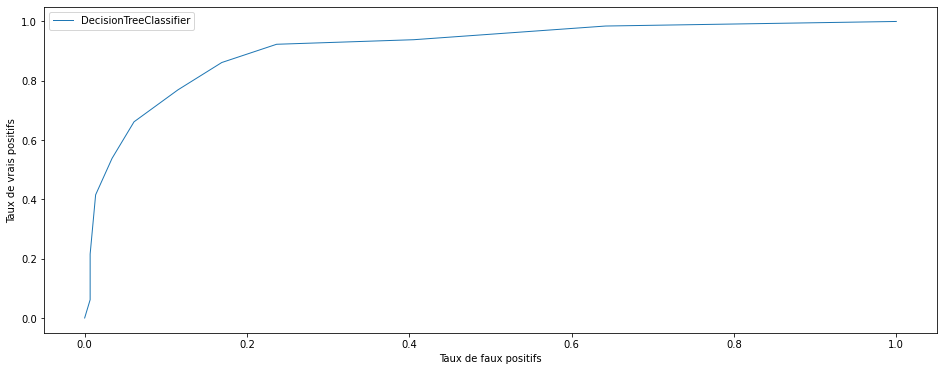

In [ ]:
probas_ = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
plt.plot(fpr, tpr, lw=1,label="DecisionTreeClassifier")
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")

Feature ranking:
1. feature 52 (0.079250) name: QCREDL
2. feature 32 (0.078259) name: moyrvq_M2
3. feature 44 (0.076659) name: MOYRVL
4. feature 66 (0.061426) name: ITAVCL
5. feature 47 (0.057749) name: GAGETL
6. feature 41 (0.056647) name: RELAT
7. feature 53 (0.046352) name: DMVTPL
8. feature 51 (0.037218) name: QSMOY
9. feature 54 (0.029914) name: BOPPNL
10. feature 42 (0.029688) name: AGER
11. feature 55 (0.029197) name: FACANL
12. feature 0 (0.023332) name: SEXEQ_Shom
13. feature 28 (0.020058) name: qsmoyq_Q2
14. feature 5 (0.019687) name: PCSPQ_Psan
15. feature 64 (0.018427) name: ROCNB
16. feature 48 (0.018321) name: GAGECL
17. feature 36 (0.018036) name: dmvtpq_D2
18. feature 3 (0.016716) name: PCSPQ_Pint
19. feature 45 (0.016526) name: TAVEPL
20. feature 61 (0.015822) name: XLGMTL
21. feature 49 (0.013076) name: GAGEML
22. feature 67 (0.012933) name: HAVEFL
23. feature 59 (0.011884) name: UEMNB
24. feature 58 (0.011544) name: VIEMTL
25. feature 43 (0.011128) name: OPGNBL
26. f

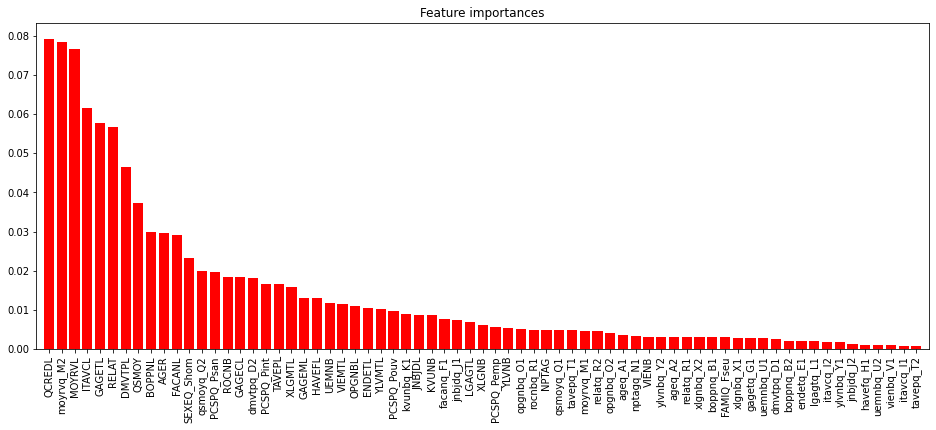

In [ ]:
importances = clf.feature_importances_


indices = np.argsort(importances)[::-1]
feature_list = [x.columns[indices[f]] for f in range(x.shape[1])]  #names of features.
ff = np.array(feature_list)

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f) name: %s" % (f + 1, indices[f], importances[indices[f]], ff[f]))

# Plot the feature importances 
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(x.shape[1]), ff, rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

In [ ]:
print(pd.crosstab(y_pred,y_test))
print(classification_report(y_test, y_pred)) 

print(accuracy_score(y_pred, y_test))

print(cross_val_score(clf, x_train, y_train, cv=10))
print(cross_val_score(clf, x_test, y_test, cv=10))

CARVP    0   1
row_0         
0      139  22
1        9  43
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       148
           1       0.83      0.66      0.74        65

    accuracy                           0.85       213
   macro avg       0.85      0.80      0.82       213
weighted avg       0.85      0.85      0.85       213

0.8544600938967136
[0.84705882 0.85882353 0.90588235 0.84705882 0.85882353 0.83529412
 0.89411765 0.84705882 0.83529412 0.78823529]
[0.81818182 0.77272727 0.63636364 0.85714286 0.66666667 0.85714286
 0.80952381 0.80952381 0.80952381 0.76190476]


In [ ]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if x[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))



The binary tree structure has 91 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if x[:, 44] <= 3.0201274156570435 else to node 56.
	node=1 is a split node: go to node 2 if x[:, 41] <= 2.5 else to node 5.
		node=2 is a split node: go to node 3 if x[:, 66] <= 9.688159465789795 else to node 4.
			node=3 is a leaf node.
			node=4 is a leaf node.
		node=5 is a split node: go to node 6 if x[:, 55] <= 11.450294017791748 else to node 51.
			node=6 is a split node: go to node 7 if x[:, 47] <= 10.804511070251465 else to node 42.
				node=7 is a split node: go to node 8 if x[:, 51] <= 7941.5 else to node 29.
					node=8 is a split node: go to node 9 if x[:, 67] <= 12.166358947753906 else to node 28.
						node=9 is a split node: go to node 10 if x[:, 2] <= 0.5 else to node 21.
							node=10 is a split node: go to node 11 if x[:, 41] <= 10.5 else to node 16.
								node=11 is a split node: go to node 12 if x[:, 3] <= 0.5 else to node 15.
									node=12 is a s

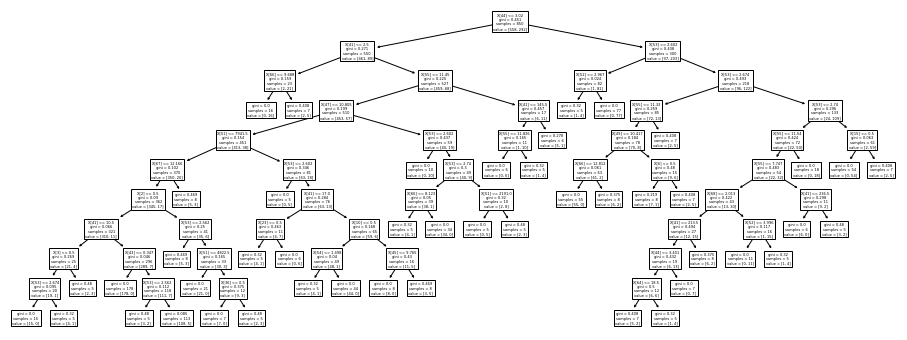

In [ ]:
from sklearn import tree

tree.plot_tree(clf)
plt.show()

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.1-py2.py3-none-any.whl size=240611 sha256=fc28953e6ca837eaa753376c5b837fdb5288fd7640ad95349c75bfa94d17d15b
  Stored in directory: /tmp/pip-ephem-wheel-cache-s_d4j3ft/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
cartes_report = ProfileReport(df_final)
print(repr(cartes_report.report))

OSError: ignored

In [ ]:
print(cartes_report.report.content)

{'body': Container(name=Root), 'footer': HTML, 'name': 'Root'}


In [ ]:
cartes_report.to_file("test rapport.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#SVM

In [70]:
## SVM


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y = df_final.CARVP
X = df_final.loc[:, 'FAMIQ_Fseu':'QCREDL']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)


svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

print(pd.crosstab(y_pred,y_test))
print(classification_report(y_test, y_pred)) 

print(accuracy_score(y_pred, y_test))
print(pd.crosstab(y_pred,y_test))


Accuracy Score:
0.7605633802816901
CARVP  Cnon  Coui
row_0            
Cnon    134    37
Coui     14    28
              precision    recall  f1-score   support

        Cnon       0.78      0.91      0.84       148
        Coui       0.67      0.43      0.52        65

    accuracy                           0.76       213
   macro avg       0.73      0.67      0.68       213
weighted avg       0.75      0.76      0.74       213

0.7605633802816901
CARVP  Cnon  Coui
row_0            
Cnon    134    37
Coui     14    28


In [71]:
pip install imbalanced-learn

In [73]:
 #Over sampling
# Il peut être nécessaire de faire un "pip install imbalanced-learn"
# 2 train_test_split sont appliqués avant et après l'oversampling
# Les variables intervenant dans le 1er sont suffixées de _os et celles du second par _over


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import roc_curve
from matplotlib import pyplot

var_dum_os = pd.get_dummies(df[["SEXEQ", "FAMIQ", "PCSPQ"]], drop_first=True)

# Selection of numerical variables
df_num_os = df.select_dtypes(exclude=['object'])

df_final_os = pd.concat([var_dum_os, df_num_os], axis=1)
#transformation de la Variable CARVP en numérique
y_os = df["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

x_os = df_final_os.loc[:, 'SEXEQ_Shom':'JNBJDL']

x_os_train, x_os_test, y_os_train, y_os_test = train_test_split(x_os, y_os, test_size = 0.20, random_state=0)


In [74]:
# example of oversampling the minority class

from collections import Counter
from imblearn.over_sampling import SMOTE

# define oversample strategy
oversample = SMOTE(sampling_strategy=1)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x_os_train, y_os_train)
# summarize class distribution qui est équilibrée
print(Counter(y_over))
# second train_test_split
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.20, random_state=0)



Counter({0: 558, 1: 558})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [75]:

logreg = LogisticRegression(solver='liblinear', max_iter=100, penalty='l2')
# fit model
logreg.fit(x_over_train, y_over_train)
# predict on test set
y_over_pred = logreg.predict(x_over_test)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(y_over_test, y_over_pred))
print('Precision: %.3f' % precision_score(y_over_test, y_over_pred))
print('Recall: %.3f' % recall_score(y_over_test, y_over_pred))
print('F-measure: %.3f' % f1_score(y_over_test, y_over_pred))

Accuracy: 0.848
Precision: 0.890
Recall: 0.833
F-measure: 0.861


In [76]:
print(pd.crosstab(y_over_pred,y_over_test))
print(classification_report(y_over_test, y_over_pred)) 

print(accuracy_score(y_over_pred, y_over_test))

print(cross_val_score(logreg, x_over_train, y_over_train, cv=10))
print(cross_val_score(logreg, x_over_test, y_over_test, cv=10))

col_0   0    1
row_0         
0      85   21
1      13  105
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.89      0.83      0.86       126

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224

0.8482142857142857
[0.84444444 0.9        0.82022472 0.71910112 0.85393258 0.7752809
 0.87640449 0.87640449 0.80898876 0.83146067]
[0.82608696 0.82608696 0.82608696 0.7826087  0.95454545 0.77272727
 0.81818182 0.90909091 0.90909091 0.59090909]


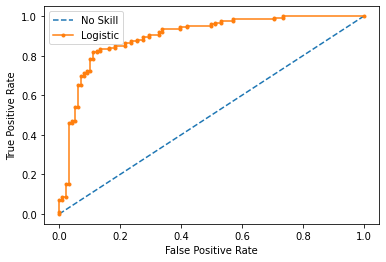

In [77]:

# retrieve just the probabilities for the positive class
pos_probs = logreg.predict_proba(x_over_test)
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_over_test, pos_probs[:,1])
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [78]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 39.6MB 2.1MB/s
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 604kB 18.2MB/s 
     |████████████████████████████████| 3.1MB 29.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 296kB 50.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.1-py2.py3-none-any.whl size=240611 sha256=9cda4b65313581e8147dde1691d3873410e3c3a063328c2c17d1993810049f26
  Stored in directory: /tmp/pip-ephem-wheel-cache-2sgacvtt/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=a8b9d1585b6f7f14cde960f19d58150a51f14e55109dd40c15c262013eb74c44
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=f

In [79]:
cartes_report = ProfileReport(df_final)
print(repr(cartes_report.report))

NameError: ignored

In [80]:
print(cartes_report.report.content)

NameError: ignored

In [81]:
cartes_report.to_file("test rapport.html")

NameError: ignored